In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../src')  # Go one level up and then into src
from SMF import SMF_BCD
from SMF_torch import smf

/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:132: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:180: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:249: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1308: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Code/SMF_BCD/SMF/notebooks/../src/SMF.py:1629: SyntaxWarning: invalid escape sequence '\h'
  '''


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)

### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(9, 70000)
(70000, 784)


In [4]:
n_components = 16

SMF_Train = SMF_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=True, threshold=0.5)

initial loading beta [[-0.00588362 -0.42763171 -0.37064353  0.34248083  0.49695215  0.99680418
   0.02041382 -0.04134488  0.61438437 -0.59255172  0.25259791  0.97725521
   0.76414001 -0.48290288  0.55888377  0.32634772  0.90501632]
 [-0.3914307  -0.49309372 -0.07740478  0.44997498  0.16271495 -0.89271246
   0.13196066 -0.89339228  0.99528505 -0.29792241 -0.20548941 -0.94321346
   0.73382001 -0.65097998 -0.55891779  0.47855003 -0.45329016]
 [ 0.89590224  0.91868334  0.66042094  0.98216666  0.40611816 -0.93139316
   0.2478174  -0.57515043  0.3374253   0.05558192  0.40608781  0.11297597
   0.66819348  0.03985771 -0.21494613  0.42298022 -0.92761391]
 [ 0.99102448 -0.64503444 -0.86591586 -0.36531903 -0.39427904  0.1983156
   0.14330428 -0.02477744  0.83353815 -0.57438185 -0.67717729 -0.96270195
  -0.31942691 -0.24325306  0.67641759  0.04082537  0.66339683]
 [-0.86080047  0.90087682  0.71585924 -0.34563647 -0.87545087  0.85916395
   0.61357396 -0.90863698  0.45779463  0.46976338 -0.75426473 

 10%|█         | 10/100 [02:38<09:02,  6.03s/it] 

!!! pred_type filter


 11%|█         | 11/100 [02:45<09:17,  6.27s/it]

!!! --- Validation --- [Accuracy] =  [0.778]


 20%|██        | 20/100 [03:30<06:16,  4.71s/it]

!!! pred_type filter


 21%|██        | 21/100 [03:36<06:38,  5.04s/it]

!!! --- Validation --- [Accuracy] =  [0.809]


 30%|███       | 30/100 [04:19<05:29,  4.70s/it]

!!! pred_type filter


 31%|███       | 31/100 [04:25<05:56,  5.17s/it]

!!! --- Validation --- [Accuracy] =  [0.822]


 40%|████      | 40/100 [05:13<05:09,  5.16s/it]

!!! pred_type filter


 41%|████      | 41/100 [05:17<04:51,  4.95s/it]

!!! --- Validation --- [Accuracy] =  [0.828]


 50%|█████     | 50/100 [06:01<04:01,  4.82s/it]

!!! pred_type filter


 51%|█████     | 51/100 [06:06<04:10,  5.12s/it]

!!! --- Validation --- [Accuracy] =  [0.832]


 60%|██████    | 60/100 [06:50<03:07,  4.68s/it]

!!! pred_type filter


 61%|██████    | 61/100 [06:56<03:12,  4.94s/it]

!!! --- Validation --- [Accuracy] =  [0.833]


 70%|███████   | 70/100 [07:35<02:10,  4.34s/it]

!!! pred_type filter


 71%|███████   | 71/100 [07:40<02:10,  4.49s/it]

!!! --- Validation --- [Accuracy] =  [0.834]


 80%|████████  | 80/100 [08:19<01:27,  4.38s/it]

!!! pred_type filter


 81%|████████  | 81/100 [08:25<01:32,  4.88s/it]

!!! --- Validation --- [Accuracy] =  [0.835]


 90%|█████████ | 90/100 [09:03<00:43,  4.32s/it]

!!! pred_type filter


 91%|█████████ | 91/100 [09:08<00:41,  4.56s/it]

!!! --- Validation --- [Accuracy] =  [0.835]


100%|██████████| 100/100 [09:50<00:00,  5.90s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


!!! pred_type filter


In [5]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [6]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.88


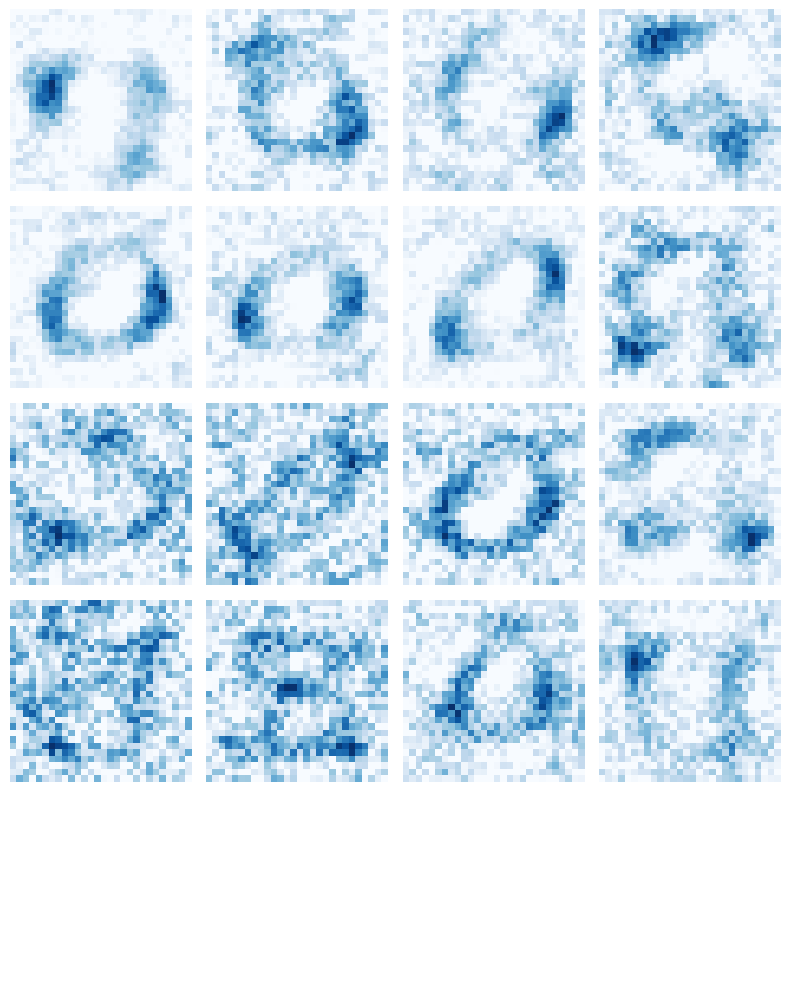

In [7]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)

images_per_row = 4
n_rows = len(image) // images_per_row + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("MINIST")

# Display the plot if needed
plt.show()

In [8]:
print(beta.T[0])

[-7.48027691  0.85022846  0.68970349 -0.90840372  1.43342242 -0.29832616
 -0.73695957  1.61235797 -0.38050721]


# Torch Version

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.autograd import Variable

"""
#data = pd.read_csv('../Data/Pancreatic_GSE16515.csv')
data = pd.read_csv('../Data/Breast_GSE70947.csv')

print(data.shape)
y = data['type'].values
y = [1 if y[i] == 'breast_adenocarcinoma' else 0 for i in range(len(y))]
y = np.array(y)
X = data.drop(columns=['samples', 'type']).values
X = (X - np.mean(X, axis = 0))/(100*np.std(X, axis = 0)) # normalization
"""


hidden_size = 2

Accuracy = []
test_size = 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, y_matrix.T, test_size=test_size, random_state=2)
# print(X_train.shape)
# print(Y_train.shape)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
# print(f"y_train's ndim: {y_train.ndim}")
# print(f"y_test: {y_test.shape}")

smf_model = smf(X_train, y_train, hidden_size = hidden_size, device='cuda')
smf_model.fit(num_epochs=500,
               lr_classification=0.01,
               lr_matrix_factorization=0.01,
               xi=1,
               initialize='spectral',
               W_nonnegativity=True,
               H_nonnegativity=True,
               test_data=[X_test, y_test],
               record_recons_error=True)
Accuracy.append(smf_model.test_multi(X_test, y_test))

--- Iteration -1: Training loss --- [Data, Label, Total] = [22269749.043104.3, 38582112242.043495.3, 38604381991.086601.3]


KeyboardInterrupt: 